### Cross Validation

The main aim of this project is to predict the prices of the houses based on all the input features like area, location, no of bedrooms using K-Fold Validation or robust model evaluation.

### Steps involved in this project:

1.   Import all the necessary libraries

2.   Load the dataset

3.   Explore data (EDA)

4.   Divide the dataset into independent and dependent variables

5.   Standardize the data

6.   Train the model using Linear Regression

7.   Apply K-Fold Cross Validation

8.   Predict the model using cross validation

9.  Display Average Metrics

10. Visualize the Results

### Step 1:  Import all the necessary libraries

In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from   sklearn.model_selection   import train_test_split, KFold, cross_val_predict
from   sklearn.preprocessing     import StandardScaler
from   sklearn.linear_model      import LinearRegression
from   sklearn.metrics         import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

### Step 2: Load the dataset

In [496]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame = True)

data = data.frame  ## gives the entire data in form of Pandas DataFrame

print(data)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

### Step 3 : Explore data (EDA)

In [497]:
### display the first five rows of the dataset

print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [498]:
### display the last five rows of the dataset

print(data.tail())

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  


In [499]:
### get the total number of records in the dataset

print("Total number of records in the dataset is:", len(data))

Total number of records in the dataset is: 20640


In [500]:
### get the columns used in the dataset

print(data.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [501]:
### get the information about the columns in the dataset

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [502]:
### get the descriptive statistics about the columns in the dataset

print(data.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [503]:
### Check if there are any NULL Records used in the dataset

print(data.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


### OBSERVATIONS:

1.  There are no NULL records in the dataset.

In [504]:
### Check for any duplicate records in the dataset

data[data.duplicated()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


### OBSERVATIONS:

1. There are no duplicate records left in the dataset.

### Step 4: Divide the dataset into independent and dependent variables

In [505]:
X = data.drop(columns='MedHouseVal', axis=1)

Y = data['MedHouseVal']

In [506]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [507]:
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

### Step 5:  Standardize the data

In [508]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

### scale the input features

X_scaled = sc.fit_transform(X)

print(X_scaled)

[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


### OBSERVATIONS:

1. All the inputs has been scaled in one range.

### Step 6: Train the model using Linear Regression

In [509]:
### Without K-Fold Validation

from sklearn.linear_model import LinearRegression

lin = LinearRegression()

### train the model

lin.fit(X_scaled, Y)

LinearRegression()

### Step 7: Apply K-Fold Cross Validation

In [510]:
### With K-Fold Validation

from sklearn.model_selection import KFold

kv = KFold(n_splits = 5, shuffle = True, random_state=42)

## OBSERVATIONS:

1. The dataset is divided into 5 folds.

2. The first 4 fold is for training and the remaining 1 fold is for validation.

3.  Here shuffle is used to maintain the random distribution across the folds.

### Step 8:  Predict the model using cross validation

In [511]:
from sklearn.model_selection import cross_val_predict


Y_pred = cross_val_predict(lin, X_scaled, Y, cv = kv)


In [512]:
print(Y_pred)

[4.15194269 3.96905697 3.6867778  ... 0.17153733 0.30610801 0.51971809]


## OBSERVATION:

1. cross_val_predict -> This function performs the K Fold cross validation along with it predicts the output for the model

### Steps it does

(i)  It first considers the entire dataset(X_scaled, Y)

(ii) It divides the dataset into K number of equal folds.

     (a)  (K-1) fold is done for the training 

     (b)  Remaining 1 fold is done for the testing.


(iii) This process is repeated for K number of times.

(iv) For each fold, output is predicted and then we combine all the outputs and store it in predicted output.

### Step 9: Display Average Metrics

In [513]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

print("R2 Score of the model is:", r2_score(Y_pred,Y))
print("Mean Absolute Error of the model is:", mean_absolute_error(Y_pred,Y))
print("Mean Squared Error of the model is:", mean_squared_error(Y_pred,Y))
print("Root Mean Squared Error of the model is:", root_mean_squared_error(Y_pred,Y))

R2 Score of the model is: 0.3484092285877153
Mean Absolute Error of the model is: 0.5316768254176782
Mean Squared Error of the model is: 0.5305724639238886
Root Mean Squared Error of the model is: 0.728404052654767


### Step 10 : Visualize the Results

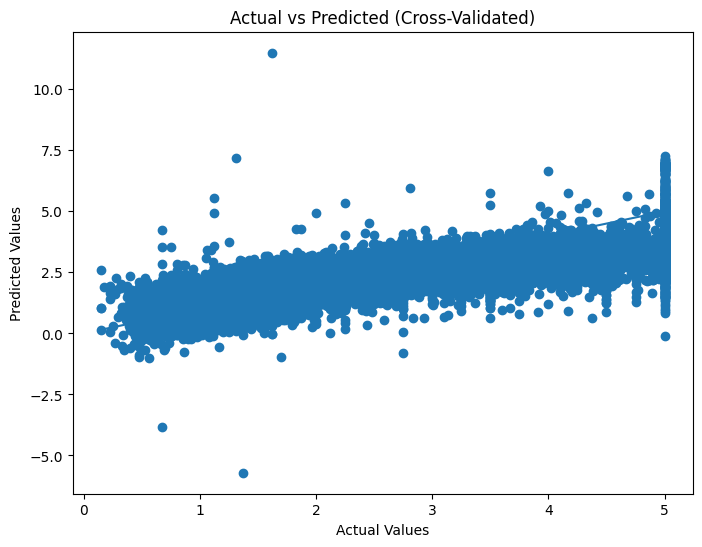

In [514]:
### Actual vs Predicted Values

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(Y, Y_pred)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()])  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Cross-Validated)")
plt.show()


### OBSERVATIONS:

1. The above graph shows the overall distribution for the Actual Values vs Predicted Values.

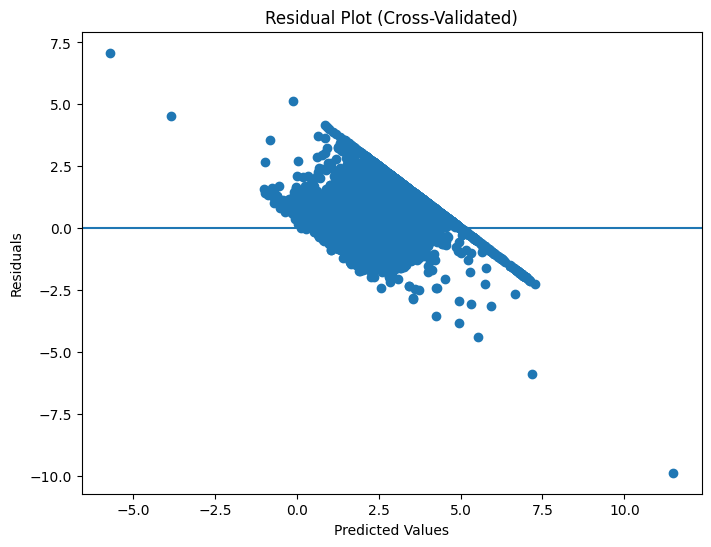

In [515]:
### Residual Plot

residuals = Y - Y_pred

plt.figure(figsize=(8,6))
plt.scatter(Y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Cross-Validated)")
plt.show()


### OBSERVATIONS:

1. The above graph shows the overall distribution for the  Predicted Values vs the Residuals.

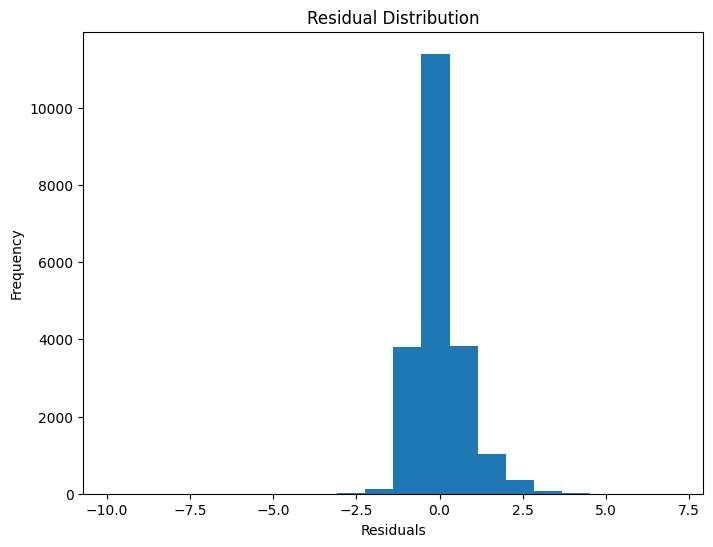

In [516]:
### Residual Distribution

plt.figure(figsize=(8,6))
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


### OBSERVATIONS:

1. The above graph shows the overall distribution of all the Residuals 